In [3]:
import pandas as pd

#load dataset
df = pd.read_csv("owid-covid-data.csv")

print(df)




       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
429430      ZWE    Africa     Zimbabwe  2024-07-31     266386.0        0.0   
429431      ZWE    Africa     Zimbabwe  2024-08-01     266386.0        0.0   
429432      ZWE    Africa     Zimbabwe  2024-08-02     266386.0        0.0   
429433      ZWE    Africa     Zimbabwe  2024-08-03     266386.0        0.0   
429434      ZWE    Africa     Zimbabwe  2024-08-04     266386.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [6]:
#checking columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [7]:
#Identify missing values
df.isnull().sum()

iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [10]:
# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Select countries of interest
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

# Drop rows where date or total_cases is missing
df_filtered = df_filtered.dropna(subset=['date', 'total_cases'])

# Fill missing numeric columns with forward fill
df_filtered[['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']] = \
    df_filtered[['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']].fillna(method='ffill')

# Confirm cleanup
print(df_filtered.isnull().sum())


iso_code                                      0
continent                                     0
location                                      0
date                                          0
total_cases                                   0
                                           ... 
population                                    0
excess_mortality_cumulative_absolute       4813
excess_mortality_cumulative                4813
excess_mortality                           4813
excess_mortality_cumulative_per_million    4813
Length: 67, dtype: int64


In [11]:
countries = ['Kenya', 'India', 'United States']
df_filtered = df[df['location'].isin(countries)]

df_filtered = df_filtered.sort_values(["location", "date"])
df_filtered[["total_cases", "total_deaths", "new_cases"]] = df_filtered[["total_cases", "total_deaths", "new_cases"]].fillna(method="ffill")


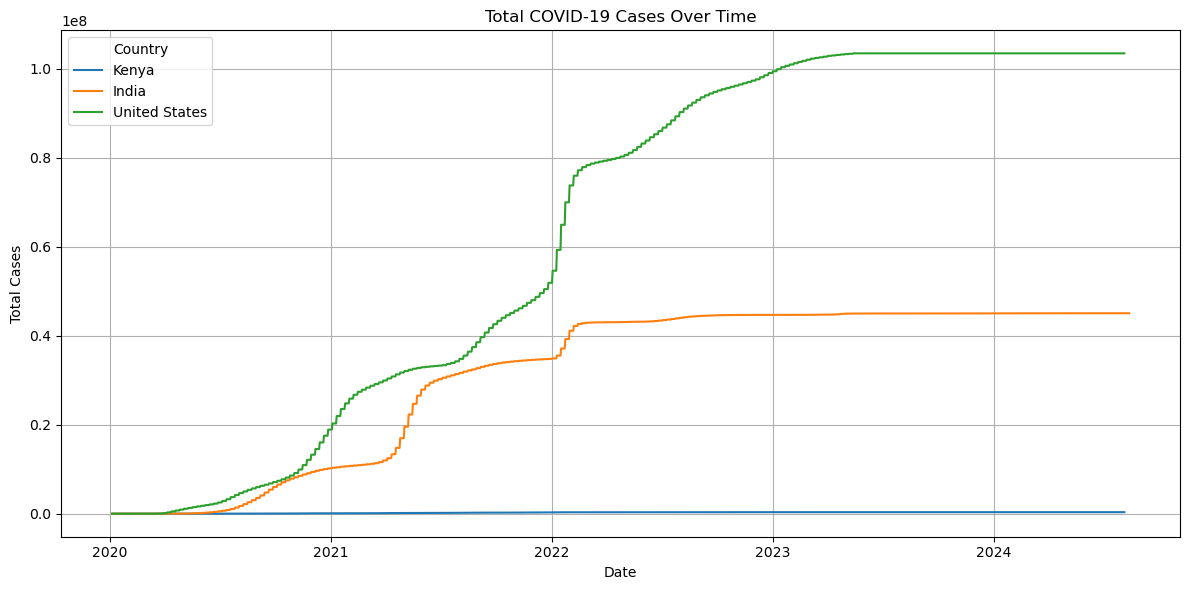

In [13]:
import matplotlib.pyplot as plt
#total cases for kenya,United state,India
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df_filtered[df_filtered['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)

# Chart formatting
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

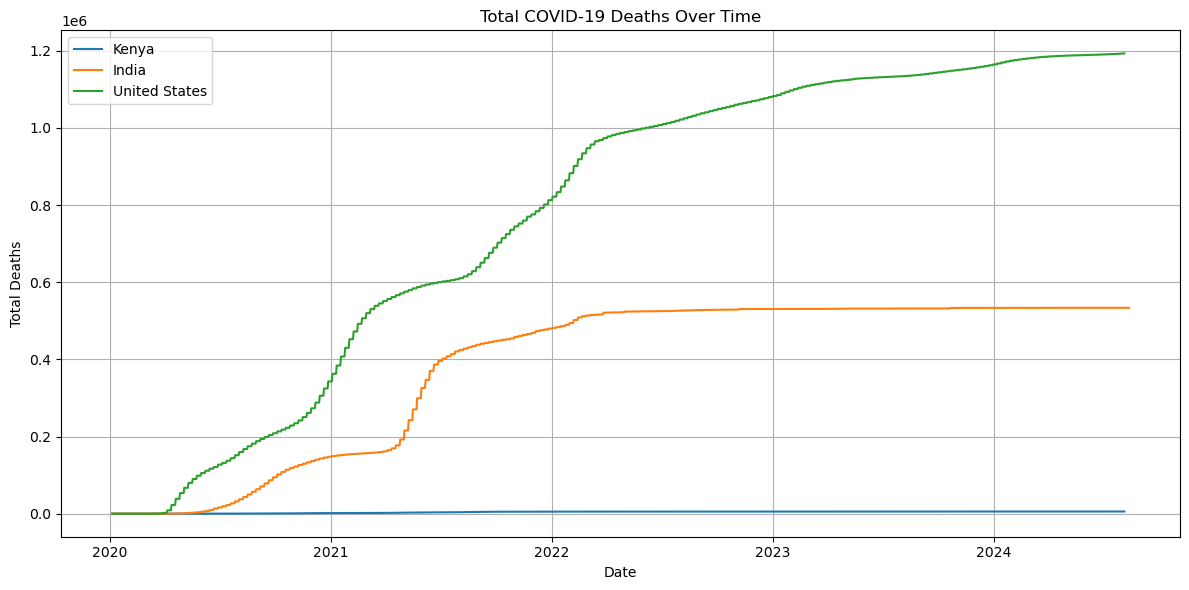

In [14]:
#total deaths over time
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["total_deaths"], label=country)

plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


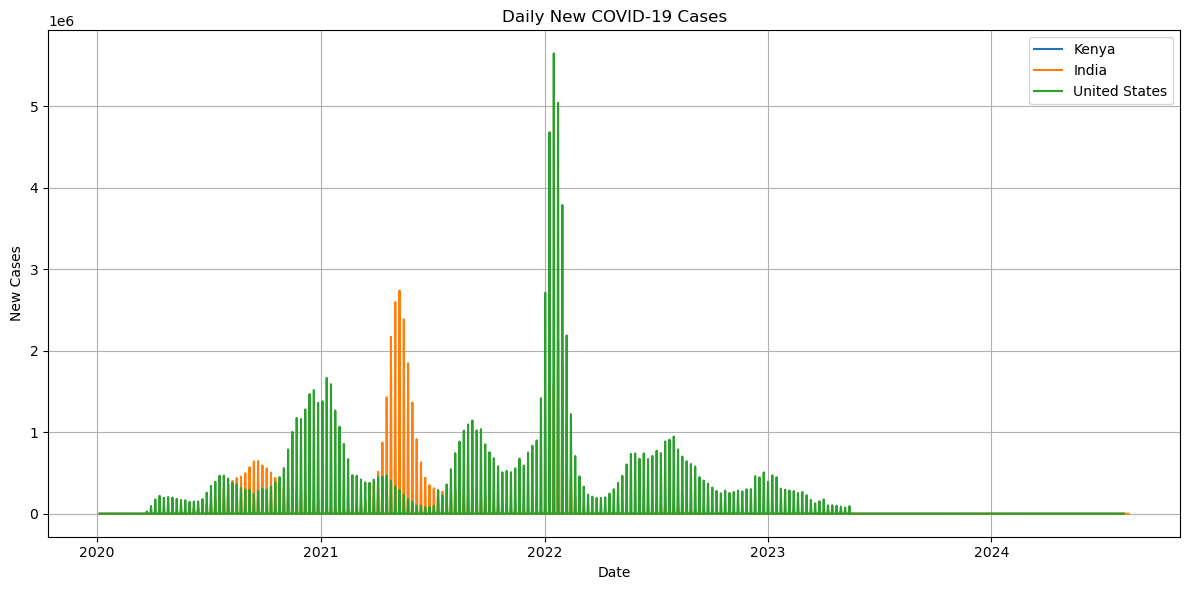

In [16]:
#daily cases between countries
plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["new_cases"], label=country)

plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


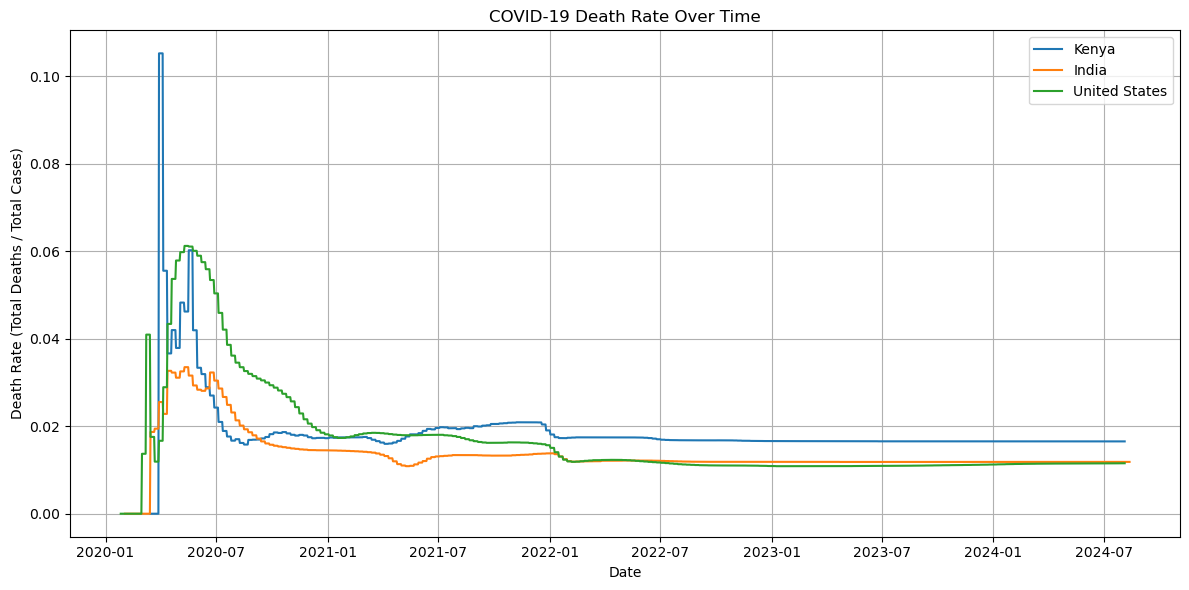

In [17]:
#death rates
df_filtered["death_rate"] = df_filtered["total_deaths"] / df_filtered["total_cases"]

plt.figure(figsize=(12, 6))
for country in countries:
    data = df_filtered[df_filtered["location"] == country]
    plt.plot(data["date"], data["death_rate"], label=country)

plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate (Total Deaths / Total Cases)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


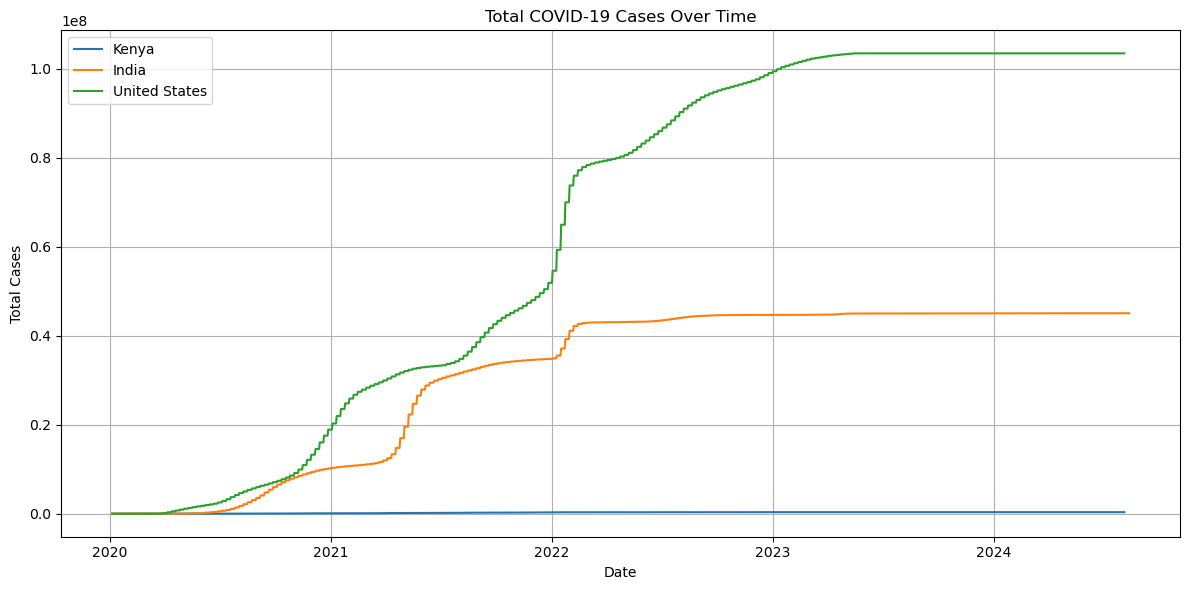

In [18]:
#  Total Cases Over Time ---
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

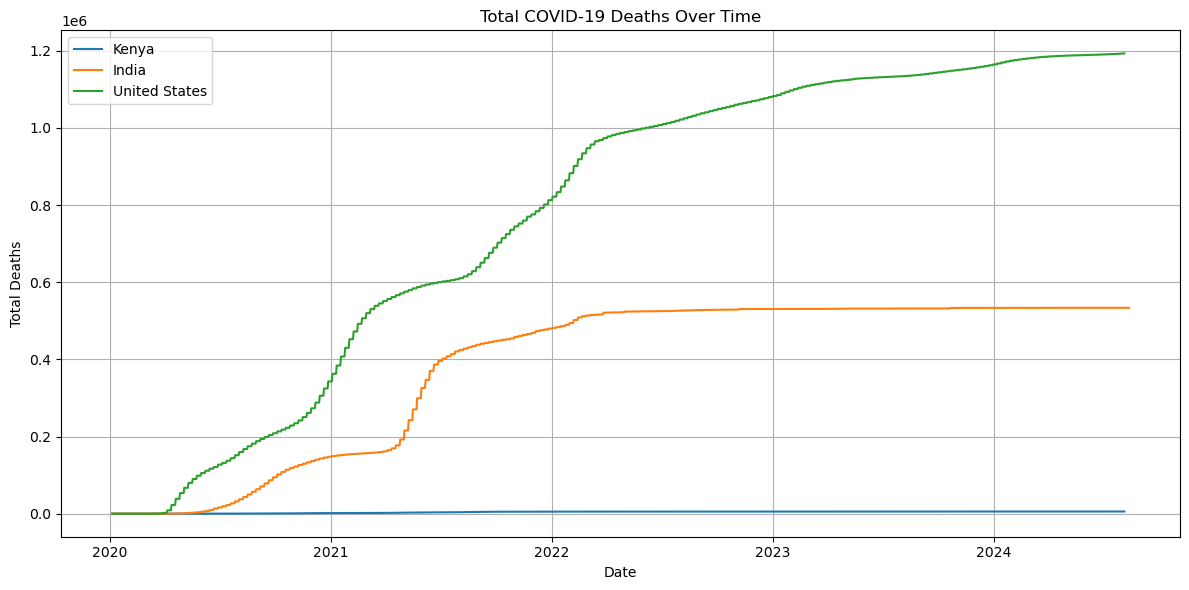

In [19]:
# --- Total Deaths Over Time ---
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_filtered[df_filtered['location'] == country]
    plt.plot(subset['date'], subset['total_deaths'], label=country)
plt.title('Total COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

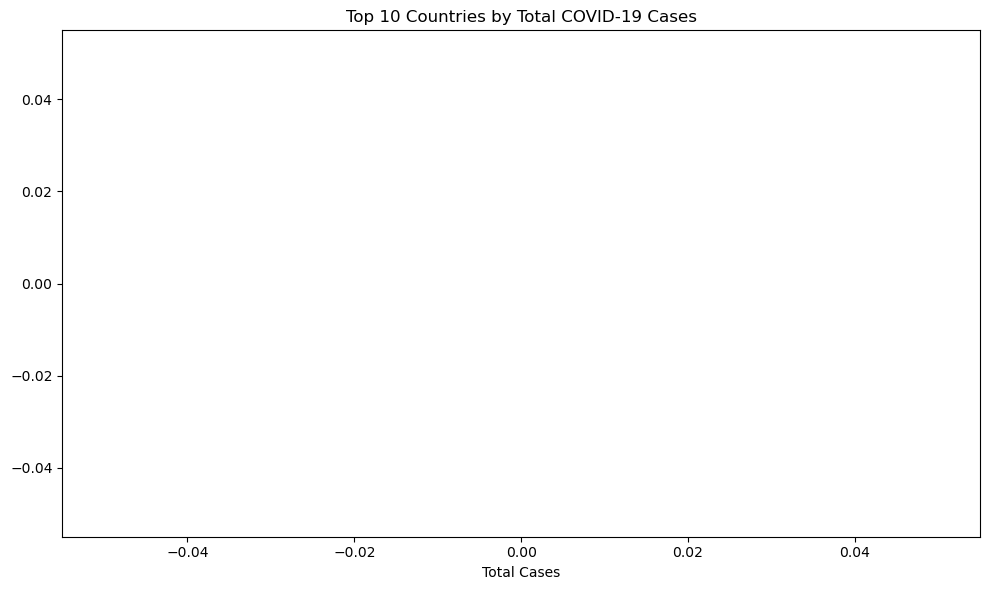

In [20]:
# Remove non-countries (e.g., continents, World, etc.)
df_countries = df[df['iso_code'].str.len() == 3]

# Get the latest data for each country
latest_date = df_countries['date'].max()
latest_df = df_countries[df_countries['date'] == latest_date]

# Top 10 countries by total cases
top10 = latest_df[['location', 'total_cases']].dropna().sort_values(by='total_cases', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(top10['location'][::-1], top10['total_cases'][::-1], color='tomato')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.xlabel('Total Cases')
plt.tight_layout()
plt.show()



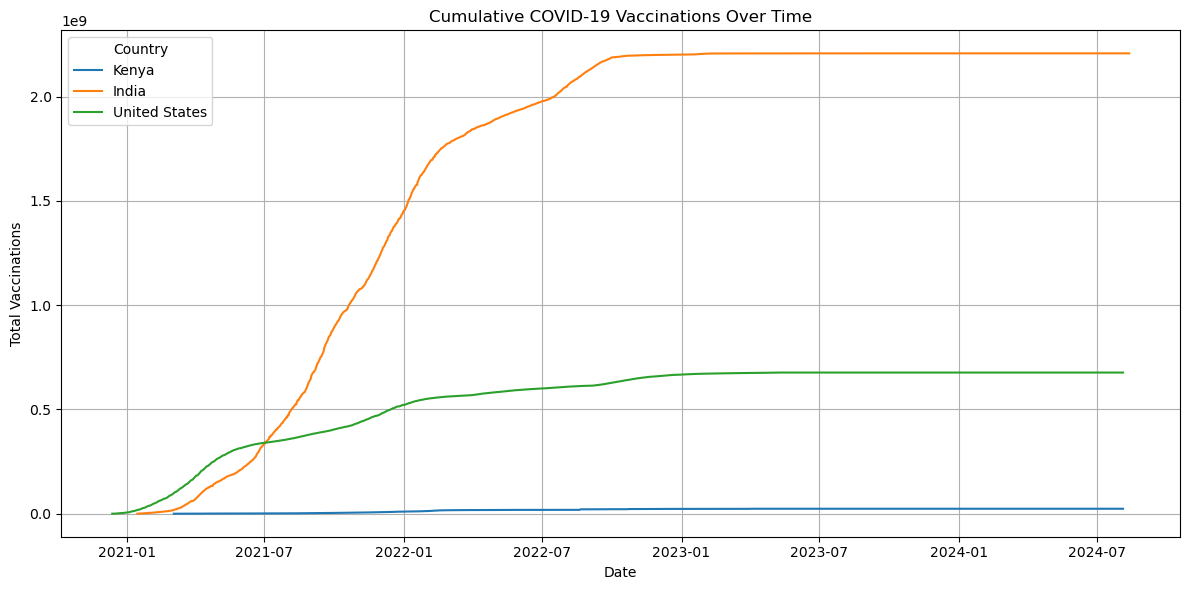

In [27]:
# Plot
import matplotlib.pyplot as plt
# Filter relevant rows
df_vax = df[df['location'].isin(countries)].copy()
df_vax.sort_values(['location', 'date'], inplace=True)

# Fill missing values in total_vaccinations
df_vax['total_vaccinations'] = df_vax.groupby('location')['total_vaccinations'].ffill()

# Plot
plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_vax[df_vax['location'] == country]
    if not subset.empty:
        plt.plot(subset['date'], subset['total_vaccinations'], label=country)
    else:
        print(f"No data available for {country}")

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df_vax[df_vax['location'] == country]
    if not subset.empty:
        plt.plot(subset['date'], subset['total_vaccinations'], label=country)
    else:
        print(f"No data available for {country}")

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Total Vaccinations')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

NameError: name 'df_vax' is not defined

<Figure size 1200x600 with 0 Axes>